Reference:
    
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Cluster Plot canbe used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the ‘murder’ and ‘assault’ columns as X and Y axis. Alternately you can use the first to principal components as rthe X and Y axis.

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import pandas as pd
import numpy as np

In [9]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

In [10]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [11]:
# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

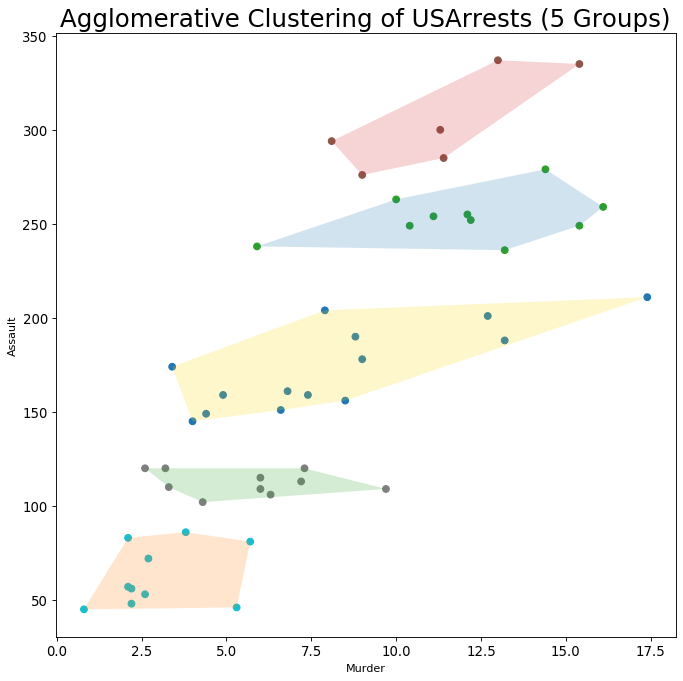

In [14]:
# Plot
plt.figure(figsize=(10, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()